# **HAND  WRITTEN DIGITAL PREDICTION-CLASSIFICATION ANALYSIS**

**The digits dataset consists of 8x8 pixels images of digits. The images attributes of the dataset stores 8x8 arrays of grayscales values for each image.We will use these arrays to visualise the first 4 images.The traget attricute of the dataset stores the digit each image represents.**

**OBJECTIVE-The objective is to accurately and efficiently classify handwritten digits into their respective numerical categories using machine learning techniques.**

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# **Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df=load_digits

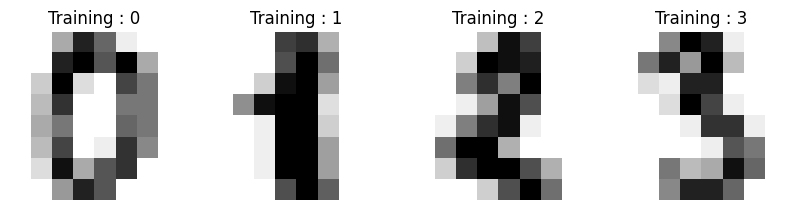

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module and assign it to the variable 'plt'
from sklearn.datasets import load_digits # Import the load_digits function

df = load_digits() # Call the load_digits function to load the dataset

_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax , image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  ax.set_title(f'Training : {label}') # Use f-string formatting to correctly include the label

# **DATA PREPROCESSING**

FLATTEN IMAGE


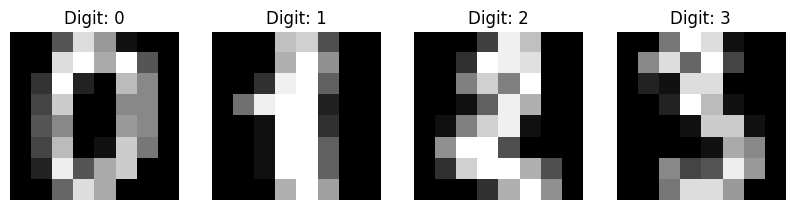

Shape of preprocessed data: (1797, 64)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Extract the first four images and their corresponding labels
images = digits.images[:4]
labels = digits.target[:4]

# Plot the first four images
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, images, labels):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Digit: {label}')
    ax.axis('off')
plt.show()

# Preprocess the images
# Flatten the images and normalize pixel values to the range [0, 1]
images_flat = digits.images.reshape((len(digits.images), -1)) / 16.0

# Check the shape of the preprocessed data
print("Shape of preprocessed data:", images_flat.shape)


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

df = load_digits() # Define df here so it is available in the current scope

df.images.shape # Access the images attribute of the df object and get its shape

(1797, 8, 8)

In [4]:
df.images[0] # Access the 'images' attribute instead of 'image'

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
df.images[0].shape

(8, 8)

In [7]:
len(df.images) # Access the 'images' attribute to get its length

1797

In [9]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

**Scaling image data**

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data= data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

In [20]:
from sklearn.model_selection import train_test_split # Fixed the import statement by removing the extra '.'

In [21]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size =0.3)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier()

In [25]:
rf.fit(x_train, y_train)

RandomForestClassifier()

**Predict Test Data**

In [26]:
y_pred = rf.predict(x_test)

In [27]:
y_pred

array([3, 8, 2, 7, 0, 0, 7, 6, 0, 6, 0, 0, 2, 5, 6, 7, 7, 2, 6, 0, 5, 7,
       3, 6, 7, 4, 7, 4, 3, 2, 3, 6, 4, 8, 8, 9, 6, 2, 5, 1, 1, 5, 0, 1,
       5, 6, 4, 0, 3, 5, 1, 6, 5, 6, 8, 5, 8, 9, 9, 9, 2, 1, 5, 3, 7, 7,
       9, 0, 1, 8, 6, 7, 2, 9, 5, 5, 6, 6, 6, 7, 1, 1, 2, 5, 2, 9, 7, 3,
       2, 9, 0, 2, 1, 6, 0, 9, 0, 8, 6, 7, 1, 8, 7, 4, 4, 6, 6, 9, 4, 3,
       1, 5, 2, 7, 8, 5, 3, 5, 2, 2, 6, 0, 0, 3, 4, 7, 8, 4, 0, 3, 4, 9,
       0, 4, 7, 5, 3, 6, 9, 1, 7, 4, 4, 5, 9, 1, 9, 7, 1, 8, 3, 2, 1, 4,
       6, 4, 9, 4, 4, 7, 6, 4, 6, 9, 5, 2, 0, 7, 5, 1, 2, 7, 7, 2, 0, 6,
       8, 1, 8, 1, 1, 6, 9, 6, 4, 7, 1, 8, 9, 5, 4, 3, 9, 4, 4, 5, 7, 7,
       0, 8, 3, 1, 2, 1, 0, 3, 3, 8, 8, 9, 7, 0, 0, 2, 7, 3, 4, 1, 0, 2,
       9, 2, 4, 7, 6, 0, 9, 2, 0, 1, 9, 7, 5, 8, 3, 3, 4, 7, 6, 1, 7, 3,
       1, 4, 9, 9, 7, 0, 9, 2, 6, 4, 8, 0, 9, 2, 5, 5, 2, 3, 4, 1, 6, 8,
       3, 6, 2, 1, 4, 9, 8, 6, 9, 1, 1, 8, 7, 5, 5, 4, 9, 5, 3, 8, 7, 5,
       0, 7, 8, 2, 7, 5, 0, 1, 5, 7, 0, 8, 6, 0, 8,

**Model Accuracy**

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
# Assuming 'y_test' contains the true labels for your test data
confusion_matrix(y_test, y_pred)

array([[62,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 51,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 49,  1,  0,  1,  2],
       [ 1,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 53]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       0.97      1.00      0.98        57
           2       1.00      0.98      0.99        52
           3       1.00      0.96      0.98        53
           4       1.00      0.98      0.99        51
           5       1.00      0.92      0.96        53
           6       0.98      0.98      0.98        51
           7       1.00      0.98      0.99        57
           8       0.94      0.98      0.96        50
           9       0.93      0.98      0.95        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

